## DATA 201
### Regularization Techniques (Ridge and Lasso regression)

In [2]:
#Use pockets data
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split as tts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def do_Kfold(model,X,y,k,scaler = None, random_state = 146):
    from sklearn.model_selection import KFold
    
    kf = KFold(n_splits=k, random_state = random_state, shuffle=True)

    train_scores = []
    test_scores = []

    for idxTrain, idxTest in kf.split(X):
        Xtrain = X[idxTrain, :]
        Xtest = X[idxTest, :]
        ytrain = y[idxTrain]
        ytest = y[idxTest]
        if scaler != None:
            Xtrain = scaler.fit_transform(Xtrain)
            Xtest = scaler.transform(Xtest)

        model.fit(Xtrain,ytrain)

        train_scores.append(model.score(Xtrain,ytrain))
        test_scores.append(model.score(Xtest,ytest))
        
    return train_scores, test_scores

In [ ]:
#https://pudding.cool/2018/08/pockets/ #data source

In [4]:
pockets = pd.read_csv('../../data/pockets.csv')

In [ ]:
pockets.head(2)

In [5]:
metadata = pockets[['brand','style','menWomen', 'cutout']]
X_df = pockets.drop(columns = list(metadata.columns)
                          + ['name', 'fabric', 'maxHeightFront'])
X = np.array(X_df)
y = pockets['maxHeightFront'].values

In [ ]:
#Look at the data


In [3]:
help(do_Kfold)

Help on function do_Kfold in module __main__:

do_Kfold(model, X, y, k, scaler=None, random_state=146)



In [ ]:
lin_reg = LR()

In [ ]:
#run KFold validation

In [ ]:
df = pd.DataFrame(zip(train_res,test_res), columns = ['Train','Test'], 
                  )
sns.stripplot(data = df, size = 10, alpha = 0.8, palette = 'BuPu')
plt.axhline(np.mean(test_res), c = 'slategrey', linestyle = '--')
plt.show()

In [ ]:
print(np.mean(train_res), np.median(train_res))
print(np.mean(test_res), np.mean(test_res))

Do you think this model is overfit? Underfit?

This brings us to **regularization techniques**.  

The first technique we will look at is called **Ridge regression**.  In addition to minimizing the sum of squared errors, Ridge regression also penalizes a model for having more parameters and/or larger parameters.  This is accomplished by modifying the cost function:

$$\sum_{i=1}^N (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^p \beta_i^2 $$

The new term in this equation, $\alpha \sum_{i=1}^p \beta_i^2$, is called the **regularization** term.   


In [1]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler as SS

In [6]:
rid_reg = Ridge(alpha = 1)
train_res, test_res = do_Kfold(rid_reg, X, y, 10, SS())

/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


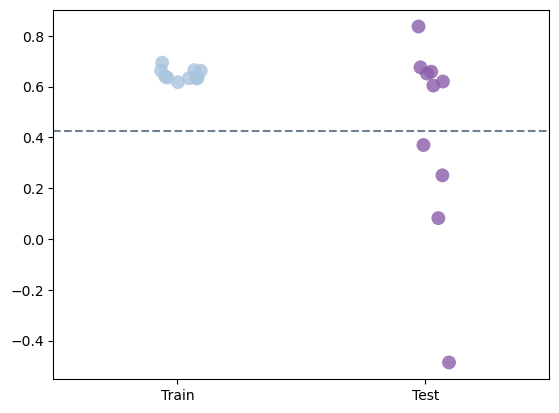

In [7]:
df = pd.DataFrame(zip(train_res,test_res), columns = ['Train','Test'], 
                  )
sns.stripplot(data = df, size = 10, alpha = 0.8, palette = 'BuPu')
plt.axhline(np.mean(test_res), c = 'slategrey', linestyle = '--')
plt.show()

In [8]:
print(np.mean(train_res), np.median(train_res))
print(np.mean(test_res), np.mean(test_res))

0.6479135873667353 0.6378564725380872
0.42641898822887503 0.42641898822887503


The number $\alpha$ is referred to as a **hyperparameter** - which is a number that is not determined during the fitting/training procedure.  Different values of $\alpha$ will lead to different results, and we will have to find the optimal value ourselves.


What should our approach be? Should we standardize the data?

### Performing Ridge Regression with optimal alpha

In order to determine what value of $\alpha$ gives the best performance, we're just going to scan through a range of values.  There is usually going to be some trial and error involved in things like this, and there's no guarantee that we'll start anywhere close to the best answer!

Let's pause to think about our next steps a little more:

- For each value of $\alpha$ we're going to do a $K$-fold validation
- For each $K$-fold validation, we're going to get a list of training and testing scores
- That could potentially be a lot of info to keep track of!
- Instead of storing all the scores from each validation run, I'll keep track of the averages

We'll make a plot to examine our results use it to guide our next steps throughout this process.  We can plot the $\alpha$ values on the x-axis, and the average training/testing scores on the y-axis.

In [9]:
#this is just a tester so you can see what the code is doing
#if you're looking for something to copy and paste, use the code in the next block
a_range = np.linspace(10,20,5)
k = 2
ss = SS()

avg_tr_score=[]
avg_te_score=[]

for a in a_range:
    print('\nCurrent alpha', a)
    rid_reg = Ridge(alpha=a)
    train_scores, test_scores = do_Kfold(rid_reg, X, y, k, ss)
    print('Training scores:', train_scores)
    print('Test scores:', test_scores)
    avg_tr_score.append(np.mean(train_scores))
    print('Current values in avg_tr_score:',avg_tr_score)
    avg_te_score.append(np.mean(test_scores))
    print('Current values in avg_te_score:',avg_tr_score)


Current alpha 10.0
Training scores: [0.7339892408038868, 0.5656862208880636]
Test scores: [0.42384722312091083, 0.6105733283275985]
Current values in avg_tr_score: [0.6498377308459753]
Current values in avg_te_score: [0.6498377308459753]

Current alpha 12.5
Training scores: [0.7276016159374679, 0.5565811681694419]
Test scores: [0.4226986094561497, 0.6031729403014698]
Current values in avg_tr_score: [0.6498377308459753, 0.6420913920534549]
Current values in avg_te_score: [0.6498377308459753, 0.6420913920534549]

Current alpha 15.0
Training scores: [0.7212112580027685, 0.5476912884568625]
Test scores: [0.4210839623708781, 0.5950699464743603]
Current values in avg_tr_score: [0.6498377308459753, 0.6420913920534549, 0.6344512732298155]
Current values in avg_te_score: [0.6498377308459753, 0.6420913920534549, 0.6344512732298155]

Current alpha 17.5
Training scores: [0.7148468435322561, 0.5390920259318909]
Test scores: [0.4191238455467319, 0.5866373704477533]
Current values in avg_tr_score: [

In [10]:
k = 10
ss = SS()

a_range = np.linspace(10,20,100)

avg_tr_score=[]
avg_te_score=[]

for a in a_range:
    rid_reg = Ridge(alpha=a)
    train_scores, test_scores = do_Kfold(rid_reg, X, y, k, ss)
    
    avg_tr_score.append(np.mean(train_scores))
    avg_te_score.append(np.mean(test_scores))

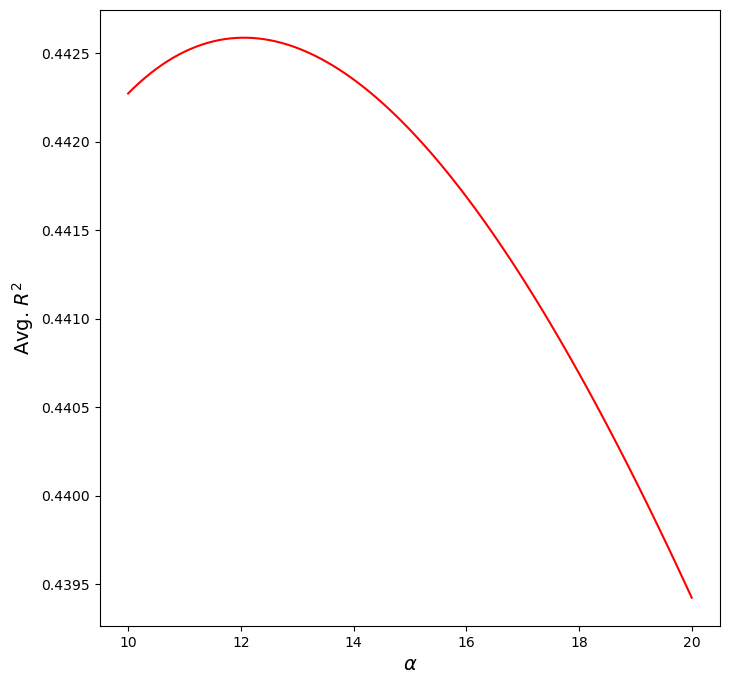

In [11]:
plt.figure(figsize=(8,8))
#plt.plot(a_range, avg_tr_score, color='k', label='Training')
plt.plot(a_range, avg_te_score, color='r', label='Testing')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('Avg. $R^2$', fontsize=14)
#plt.legend()
plt.show()

In [12]:
idx_max = np.argmax(avg_te_score)

print('Optimal alpha in the range tested: ', a_range[idx_max])
print('Avg. training score at this value: ', avg_tr_score[idx_max])
print('Avg. testing score at this value: ', avg_te_score[idx_max])

Optimal alpha in the range tested:  12.02020202020202
Avg. training score at this value:  0.6344576593800286
Avg. testing score at this value:  0.44258643208744763


Were we able to improve the model?

OLS: 0.64813 0.42151  
Ridge: 0.63446 0.44259 

To reinforce what exactly is going on here, let's take a look at the model coefficients compared to the OLS solution. We will fit both types of models to a single train-test split. 

In [ ]:
Xtrain,Xtest,ytrain,ytest = tts(X,y,train_size = 0.8, shuffle = True, random_state = 201) #does this generate values or indices?

In [ ]:
#Scale the data
Xtrain_s = 
Xtest_s = 

#### Fit OLS Model

In [ ]:
lin_reg.fit(Xtrain_s,ytrain)
#Scores
print('Train:',lin_reg.score(Xtrain_s, ytrain))
print('Test:', lin_reg.score(Xtest_s, ytest))

In [ ]:
lin_coefs = lin_reg.coef_ #add if you get an error [0]
print(lin_coefs)

#### Fit Ridge Model

In [ ]:
rid_reg = Ridge(alpha = a_range[idx_max])
rid_reg.fit(Xtrain_s, ytrain)

In [ ]:
#Scores
print('Train:',rid_reg.score(Xtrain_s, ytrain))
print('Test:', rid_reg.score(Xtest_s, ytest))

In [ ]:
rid_coefs = rid_reg.coef_ #add if you get an error [0]

#### Compare coefficients

In [ ]:
compare = pd.DataFrame(data=zip(lin_coefs,rid_coefs),index=X_df.columns,
                      columns = ['OLS','Ridge'])
compare

In [ ]:
a_range = np.linspace(0,500,100)
rid_coefs = []
for a in a_range:
    rid_reg = Ridge(alpha=a)
    rid_reg.fit(Xs,y)
    rid_coefs.append(rid_reg.coef_) #add [0] if you get something funky

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(a_range, rid_coefs, linewidth = 3, alpha = 0.8)
plt.scatter([0]*len(lin_coefs), lin_coefs, s= 80, c = 'k', zorder = 10)
plt.axhline(0, linewidth = 4, c = 'black', linestyle = '--', alpha = 0.5)
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('Coefficients', fontsize=14)
plt.legend(X_df.columns, bbox_to_anchor=[1,0.5], loc='center left')
plt.show()

### Lasso Regression

Lasso regression is very similar to Ridge regression, although the results can be quite a bit different!  The only difference between the two methods is the regularization term.  For Lasso, the cost function is:

$$\sum_{i=1}^N (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^p |\beta_i| $$

That is, instead of squaring the coefficients, we are taking their absolute value.  Although this might not seem like a big difference, it has some interesting consequences. Do you remember what they are?

The implementation, however, is identical:

In [ ]:
from sklearn.linear_model import Lasso

#### Final optimal alpha

In [ ]:
a_range = np.linspace(1e-5,0.2,100)
k = 10
ss = SS()

avg_tr_score=[]
avg_te_score=[]

for a in a_range:
    las_reg = Lasso(alpha=a)
    train_scores, test_scores = do_Kfold(las_reg, X, y, k, ss)
    
    avg_tr_score.append(np.mean(train_scores))
    avg_te_score.append(np.mean(test_scores))

In [ ]:
plt.figure(figsize=(8,8))
#plt.plot(a_range, avg_tr_score, color='k', label='Training')
plt.plot(a_range, avg_te_score, color='r', label='Testing')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('Avg. $R^2$', fontsize=14)
plt.legend()
plt.show()

In [ ]:
idx_max = np.argmax(avg_te_score)

print('Optimal alpha in the range tested: ', a_range[idx_max])
print('Avg. training score at this value: ', avg_tr_score[idx_max])
print('Avg. testing score at this value: ', avg_te_score[idx_max])

#### Run on single tts to compare with Ridge and OLS

In [ ]:
las_reg = Lasso(alpha = a_range[idx_max])
las_reg.fit(Xtrain_s, ytrain)

In [ ]:
#Scores
print('Train:',las_reg.score(Xtrain_s, ytrain))
print('Test:', las_reg.score(Xtest_s, ytest))

In [ ]:
las_coefs =las_reg.coef_
las_coefs

In [ ]:
compare['Lasso'] = las_coefs
compare

In [ ]:
a_range = np.linspace(1e-6,10,100)
las_coefs = []
for a in a_range:
    las_reg = Lasso(alpha=a)
    las_reg.fit(Xs,y)
    las_coefs.append(las_reg.coef_)

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(a_range, las_coefs)
plt.scatter([0]*len(lin_coefs), lin_coefs)
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('Coefficients', fontsize=14)
plt.legend(X_df.columns, bbox_to_anchor=[1,0.5], loc='center left')
plt.show()